# **Agency**
Compute the agency of documents in the dataset and plot the results

In [1]:
#install bertagent
!pip install bertagent

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.6 MB/s eta 0:00:00
  Created wheel for contexttimer: filename=contexttimer-0.3.3-py3-none-any.whl size=5804 sha256=3e8399304a67057dc1bba2360e6eccf17d4e004e0a69d1a6ef27804a418c0a29
  Stored in directory: /root/.cache/pip/wheels/72/1c/da/cfd97201d88ccce214427fa84a5caeb91fef7c5a1b4c4312b4
Successfully built contexttimer


In [2]:
#import all necessary packages
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle
import matplotlib.cm as cm
import seaborn as sns

from bertagent import BERTAgent
ba0 = BERTAgent()

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/816 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/400 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Mounted at /content/drive


In [ ]:
#load the dataset
in_dir = "drive/MyDrive/dataset/"
in_file = "reddit_dataset_total"
df = pd.read_csv(in_dir+in_file+".csv")

In [ ]:
#split the text in sentences
df["sents"] = df.title.str.split(".")
df.head(4)

,id,parent_id,subreddit,title,ups,length,category,num_comments,sents
0,j7uvvzp,t3_10xv170,worldnews,Some comments are missing how this suit is via...,11118,326.0,comment,NaN,[Some comments are missing how this suit is vi...
1,j7v5vmu,t3_10xv170,worldnews,It was either shell or BP who came up.with the...,269,180.0,comment,NaN,"[It was either shell or BP who came up, with t..."
2,j7ugj2i,t3_10xv170,worldnews,This kind of accountability is decades overdue...,5124,85.0,comment,NaN,[This kind of accountability is decades overdu...
3,j7ubqhy,t3_10xv170,worldnews,Good.\n\nPeople in power need to stop being ab...,16000,210.0,comment,NaN,"[Good, \n\nPeople in power need to stop being ..."


In [ ]:
#run bertagent
model_id = "ba0"
tqdm.pandas(desc="Applying function")
df[model_id] = df.sents.progress_apply(ba0.predict)
df["BATot"] = df[model_id].apply(ba0.tot)
df["BAPos"] = df[model_id].apply(ba0.pos)
df["BANeg"] = df[model_id].apply(ba0.neg)
df["BAAbs"] = df[model_id].apply(ba0.abs)

cols0 = [
    "sents",
    "ba0",
    "BATot",
    "BAPos",
    "BANeg",
    "BAAbs",
]

Applying function: 100%|██████████| 64967/64967 [29:50<00:00, 36.29it/s]


In [ ]:
df[cols0].tail(n=8)

,sents,ba0,BATot,BAPos,BANeg,BAAbs
12462,[What does Sustainability mean from an investo...,[0.06297742575407028],0.062977,0.062977,0.000000,0.062977
12463,[Explosive Growth in the Sustainable Finance M...,[0.39803096652030945],0.398031,0.398031,0.000000,0.398031
12464,[Enterprise Sustainability Technology Investme...,[0.17990273237228394],0.179903,0.179903,0.000000,0.179903
12465,[Biggest Sustainability Trends in 2023],[0.1946759968996048],0.194676,0.194676,0.000000,0.194676
12466,[Do you know of anyone?],[-0.030830584466457367],-0.030831,0.000000,0.030831,0.030831
12467,[Are Sustainable Loans Shaping the Future of F...,[0.2394251674413681],0.239425,0.239425,0.000000,0.239425
12468,[Is a Career in Green and Sustainable Finance ...,[0.3192414939403534],0.319241,0.319241,0.000000,0.319241
12469,[Sustainability behavior reflection],[0.07532477378845215],0.075325,0.075325,0.000000,0.075325


In [ ]:
#save the output
out_dir = "drive/MyDrive/dataset/"
out_file = "dataset_with_agency_total"
df.to_excel(out_dir+out_file+".xlsx", index=True)

In [3]:
#uncomment to load the data in order not to run bertagent again
#in_dir = "drive/MyDrive/dataset/"
#in_file = "dataset_with_agency_total"
#df = pd.read_excel(in_dir+in_file+".xlsx")
#df.shape

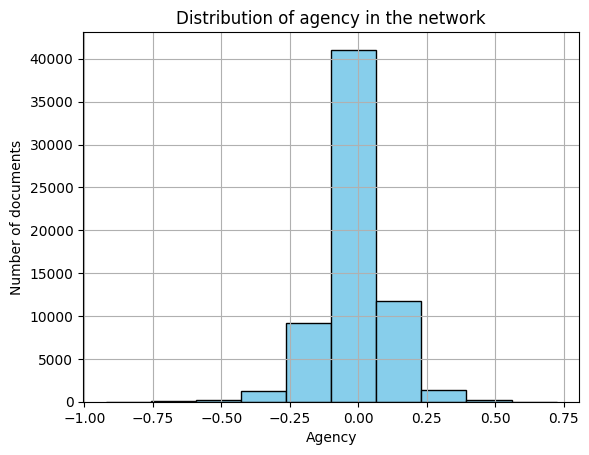

In [ ]:
#plot the histogram related to the agency of the whole network
#results, edges = np.histogram(df['BATot'], normed=True)
#binWidth = edges[1] - edges[0]
#plt.bar(edges[:-1], results*binWidth, binWidth,color='skyblue', edgecolor='black' )
plt.hist(df['BATot'],color = "skyblue", ec="black")
plt.xlabel('Agency')
plt.ylabel('Number of documents')
plt.title('Distribution of agency in the network')
plt.grid(True)
plt.show()

# **Per-community agency**

In [4]:
#load the community assignment
in_dir = "drive/MyDrive/dataset/"
C_l=pickle.load(open(in_dir+"C_l_na_post.p", "rb"))
d_C_l = C_l.toarray()

In [5]:
#load the adjacency matrix and the considered documents
in_dir = "drive/MyDrive/lab2/"
in_file = "reddit_posts_tot"
Mwd, words, documents = pickle.load(open(in_dir+in_file+"_occurrences.p","rb"))

In [6]:
#dataset of only posts
#uncomment if some documents are missing in the community assignment (ex. empty documents)
#df_final = df[(df['id'].isin(documents)) & (df['category']=="post")]
df_final = df[(df['category']=="post")]
df_final

,Unnamed: 0,id,parent_id,subreddit,title,ups,length,category,num_comments,sents,ba0,BATot,BAPos,BANeg,BAAbs
60819,60819,10xv170,NaN,worldnews,Shell’s board of directors personally sued in ...,96286,NaN,post,1860.0,['Shell’s board of directors personally sued i...,[0.0588744655251503],0.058874,0.058874,0.000000,0.058874
60820,60820,102c551,NaN,worldnews,Macron slammed for asking: 'Who could have pre...,50780,NaN,post,2378.0,"[""Macron slammed for asking: 'Who could have p...",[0.005103808827698231],0.005104,0.005104,0.000000,0.005104
60821,60821,11wkbgt,NaN,worldnews,Scientists deliver ‘final warning’ on climate ...,41134,NaN,post,4683.0,['Scientists deliver ‘final warning’ on climat...,[0.327852338552475],0.327852,0.327852,0.000000,0.327852
60822,60822,13q0xiy,NaN,worldnews,Shell’s annual shareholder meeting in London d...,34407,NaN,post,1487.0,['Shell’s annual shareholder meeting in London...,[-0.17085492610931396],-0.170855,0.000000,0.170855,0.170855
60823,60823,1641hw5,NaN,worldnews,"Climate activists target jets, yachts and golf...",28137,NaN,post,2712.0,"['Climate activists target jets, yachts and go...",[0.11724996566772461],0.117250,0.117250,0.000000,0.117250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64962,64962,10f4gnh,NaN,SustainabilityPlus,Biggest Sustainability Trends in 2023,2,NaN,post,0.0,['Biggest Sustainability Trends in 2023'],[0.1946759968996048],0.194676,0.194676,0.000000,0.194676
64963,64963,17y5db5,NaN,SustainabilityPlus,Do you know of anyone?,1,NaN,post,0.0,['Do you know of anyone?'],[-0.030830584466457367],-0.030831,0.000000,0.030831,0.030831
64964,64964,18cbzsb,NaN,SustainabilityPlus,Are Sustainable Loans Shaping the Future of Fi...,1,NaN,post,0.0,['Are Sustainable Loans Shaping the Future of ...,[0.2394251674413681],0.239425,0.239425,0.000000,0.239425
64965,64965,16edk6s,NaN,SustainabilityPlus,Is a Career in Green and Sustainable Finance Y...,1,NaN,post,0.0,['Is a Career in Green and Sustainable Finance...,[0.3192414939403534],0.319241,0.319241,0.000000,0.319241


In [ ]:
#dataframe of communities
names = ['c_{}'.format(i) for i in range(d_C_l.shape[1])]
df_c = pd.DataFrame(names, columns=['name'])

<ipython-input-43-b3c9cdef1733>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = cm.get_cmap('viridis', d_C_l.shape[1])
<ipython-input-43-b3c9cdef1733>:17: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  results, edges = np.histogram(doc["BATot"], normed=True)


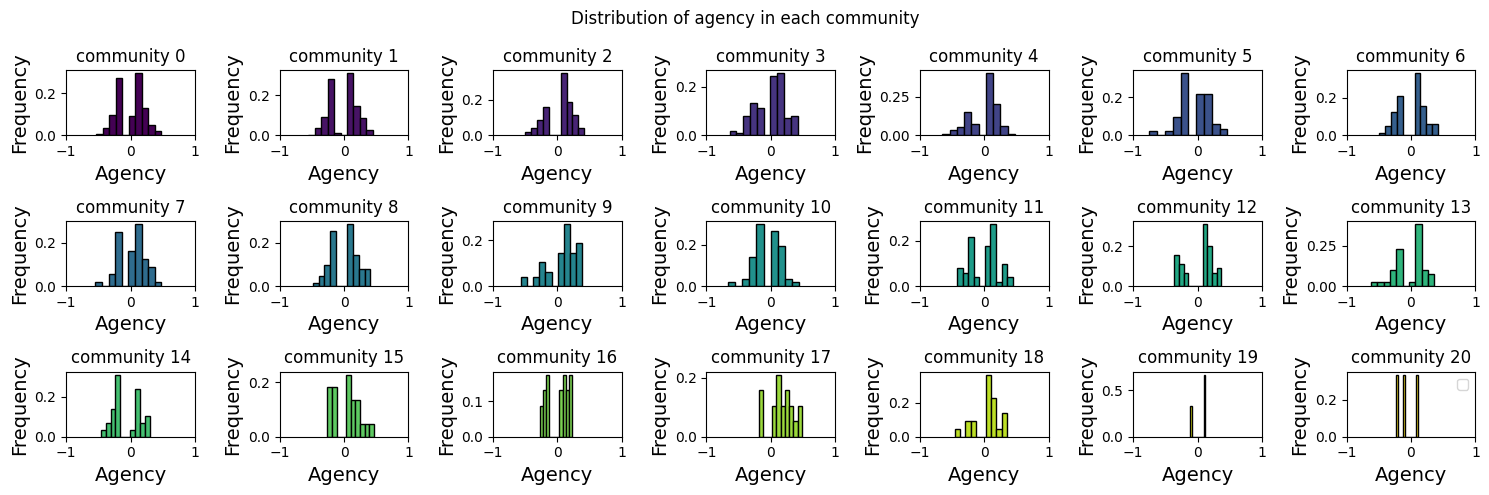

In [ ]:
#plot histogram of agency for each community
data=[]
av_agency=[]
fig, axs = plt.subplots(np.floor(d_C_l.shape[1]/np.floor(d_C_l.shape[1]/3)).astype(int),np.ceil(d_C_l.shape[1]/3).astype(int), figsize=(15, 5))
palette = cm.get_cmap('viridis', d_C_l.shape[1])

for i, ax in enumerate(axs.flatten()):
#for i in range(7):
  if(i==d_C_l.shape[1]):
    break
  mask_column = d_C_l[:, i].astype(int)
  doc=df_final.iloc[np.where(mask_column)[0],:]
  doc=doc[np.abs(doc['BATot'])>=0.1]
  data.append(doc["BATot"])
  av_agency.append(np.mean(doc["BATot"]))
  #ax.hist(doc["BATot"], bins=20, label=i, histtype='bar')
  results, edges = np.histogram(doc["BATot"], normed=True)
  binWidth = edges[1] - edges[0]
  color = palette(i / d_C_l.shape[1])
  ax.bar(edges[:-1], results*binWidth, binWidth, edgecolor='black', color=color )
  #ax.hist(doc["BATot"])
  ax.set_title(f'community {i}')
  ax.set_xlabel('Agency', fontsize=14)
  ax.set_ylabel('Frequency', fontsize=14)
  ax.set_xlim(-1, 1)


df_c["agency"]=av_agency

plt.suptitle('Distribution of agency in each community')
plt.legend()
plt.tight_layout()
plt.show()

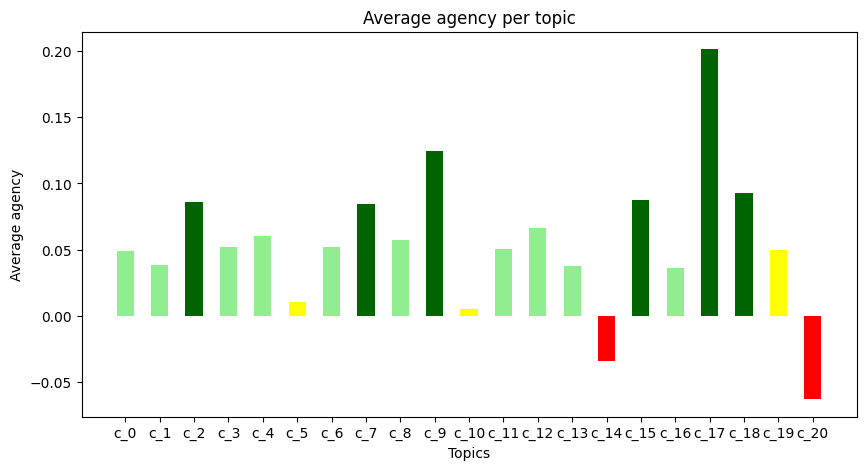

In [ ]:
plt.figure(figsize=(10,5))
sns.set_palette("husl")
cr = ['#90EE90', '#90EE90', '#006400','#90EE90', '#90EE90','#FFFF00','#90EE90', '#006400', '#90EE90', '#006400', '#FFFF00', '#90EE90','#90EE90','#90EE90','r','#006400', '#90EE90','#006400','#006400','#FFFF00','r']
plt.bar(names,df_c['agency'], width=0.5, color=cr)
# Calcolo degli spazi bianchi tra i bin
n = len(df)
plt.xlabel('Topics')
plt.ylabel('Average agency')
plt.title('Average agency per topic')
plt.show()



### Evaluate if there is a significant difference in terms of the  number of ups and comments wrt the agency

In [ ]:
#NOT USED
#if I consider the whole dataset (posts+comments), the following lines keep only posts for each community

data=[]
av_agency=[]
fig, axs = plt.subplots(np.floor(d_C_l.shape[1]/np.floor(d_C_l.shape[1]/2)).astype(int),np.ceil(d_C_l.shape[1]/2).astype(int), figsize=(15, 5))
palette = cm.get_cmap('viridis', d_C_l.shape[1])

for i, ax in enumerate(axs.flatten()):
#for i in range(7):
  if(i==d_C_l.shape[1]):
    break
  mask_column = d_C_l[:, i].astype(int)
  doc = df_final.loc[(mask_column == 1) & (df_final['category'] == "post")]
  doc=doc[np.abs(doc['BATot'])>=0.1]
  data.append(doc["BATot"])
  av_agency.append(np.mean(doc["BATot"]))
  #ax.hist(doc["BATot"], bins=20, label=i, histtype='bar')
  results, edges = np.histogram(doc["BATot"], normed=True)
  binWidth = edges[1] - edges[0]
  color = palette(i / d_C_l.shape[1])
  ax.bar(edges[:-1], results*binWidth, binWidth, edgecolor='black', color=color )
  #ax.hist(doc["BATot"])
  ax.set_title(f'community {i}')
  ax.set_xlabel('Agency', fontsize=14)
  ax.set_ylabel('Frequency', fontsize=14)
  ax.set_xlim(-1, 1)


df_c["agency_post"]=av_agency

plt.suptitle('Distribution of agency in each community')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#NOT USED
#Divide the dataset in q groups based on the agency values and compute the average number of ups and comments
gr = df_final.groupby(pd.qcut(df['BATot'], q=50))
etichette = list(gr.groups.keys())
g1=gr.get_group(etichette[5])
ups=[]
comm=[]
for ng, g in gr:
  ups.append(np.sum(g['ups'])/len(g))
  comm.append(np.sum(g['num_comments'])/len(g))
ups=ups/np.sum(ups)
comm=comm/np.sum(comm)

<ipython-input-49-86ab55d2bb48>:10: RuntimeWarning: invalid value encountered in long_scalars
  ups.append(np.sum(g['ups'])/len(g))
<ipython-input-49-86ab55d2bb48>:11: RuntimeWarning: invalid value encountered in double_scalars
  comm.append(np.sum(g['num_comments'])/len(g))


In [ ]:
#NOT USED
#plot previous results
x = np.arange(1, len(comm) + 1)
width=0.25
fig, ax = plt.subplots(layout='constrained')
rects = ax.bar(x, comm, width, label='comments')
#ax.bar_label(rects, padding=3)
rects = ax.bar(x+width, ups, width, label='ups')
#ax.bar_label(rects, padding=3)
plt.title("Average number of ups and comments wrt to the agency level")
plt.xlabel("group")
plt.ylabel("normalized ups and comments")
plt.legend()
plt.show()

# **Echo chamber effect based on posts and comments**
Comments related to a certain posts are considered the neighbors of the posts

In [ ]:
def average_leaning(df, parent_id):
  '''
  input :
  dataset
  id of the post

  output:
  average leaning of comments related to the reference post
  '''
  df_neighbors=df.loc[(df['parent_id'] == parent_id) & (df['category']=="comment")]
  return np.sum(df_neighbors['BATot'])/len(df_neighbors)

In [ ]:
def remove_t3(string):
  '''
  input : parent id

  output : correspondent post id
  '''
  if(pd.notna(string)):
    return string.replace("t3_", "")

# apply the function to the whole dataset
df['parent_id'] = df['parent_id'].apply(lambda x: remove_t3(x))

In [ ]:
#compute the neighbors leaning for the whole dataset
neig_leaning=[]

for id in df_final['id']:
  neig_leaning.append(average_leaning(df, id))

df_final["neigh_leaning"]=neig_leaning

<ipython-input-51-5f6f45a969f4>:11: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(df_neighbors['BATot'])/len(df_neighbors)
<ipython-input-62-791da668aa2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["neigh_leaning"]=neig_leaning


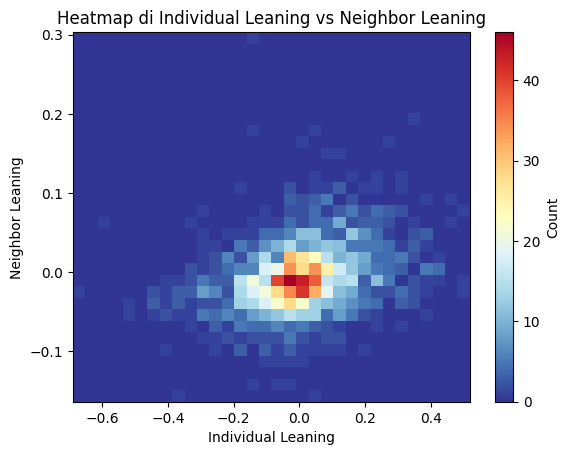

In [ ]:
# plot the previous results

#do not consider null values (ex. posts without comments)
df_notna=df_final.loc[pd.notna(df_final["neigh_leaning"])]

# compute the histogram
x = df_notna["BATot"]
y = df_notna["neigh_leaning"]
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
#H, xedges, yedges = np.histogram2d(x, y, bins=20, range=[[xmin, xmax], [ymin, ymax]])
#extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
H= plt.hist2d(x, y, bins=32, range=[[xmin, xmax], [ymin, ymax]], cmap='RdYlBu_r')
# plot the heatmap
plt.imshow(H[0], extent=[xmin, xmax, ymin, ymax],interpolation='bicubic', aspect='auto', cmap='RdYlBu_r', origin='lower')
plt.colorbar(label='Count')

plt.xlabel('Individual Leaning')
plt.ylabel('Neighbor Leaning')
plt.title('Heatmap di Individual Leaning vs Neighbor Leaning')
plt.show()


# **Echo chamber effect based on subreddits (NOT USED)**

In [ ]:
#NOT USED
#evaluate the echo chamber effect based on the subreddit division (neighbors=posts in the same subreddit)
def average_leaning2(df, subreddit):
  df_neighbors=df.loc[(df['subreddit'] == subreddit)]
  print(s, ": ",len(df_neighbors))
  return np.sum(df_neighbors['BATot'])/len(df_neighbors)

In [ ]:
#NOT USED
subreddits = df_final['subreddit'].unique()
neig_leaning={}
for s in subreddits:
  neig_leaning[s]=average_leaning2(df_final, s)
df_final['neigh_leaning2'] = df['subreddit'].map(neig_leaning)


worldnews :  259
environment :  571
collapse :  423
climate :  595
ClimateActionPlan :  51
climatechange :  310
ClimateOffensive :  214
climateskeptics :  531
climate_science :  20
ClimateShitposting :  117
GlobalClimateChange :  9
ClimateChangeWar :  6
politics :  5
climatesolutions :  2
agw :  1
vegan :  201
ZeroWaste :  110
sustainability :  226
Vechain :  250
Environmental_Careers :  237
SustainabilityPlus :  10


<ipython-input-48-160efc488edf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['neigh_leaning2'] = df['subreddit'].map(neig_leaning)


In [ ]:
#NOT USED
df_notna=df_final.loc[pd.notna(df_final["neigh_leaning2"])]

# Calcolo della densità dei punti
x = df_notna["BATot"]
y=df_notna["neigh_leaning2"]

xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

h=plt.hist2d(y,x, bins=(20,20),range=[[ymin, ymax],[xmin, xmax]], cmap='RdYlBu_r', density=True)
# Plot della heatmap
plt.imshow(h[0], extent=[xmin, xmax, ymin, ymax],aspect='auto', cmap='RdYlBu_r', origin='lower')

# Aggiunta di una barra dei colori per la heatmap
plt.colorbar(label='Count')

# Etichette degli assi e titolo
plt.xlabel('Individual Leaning')
plt.ylabel('Neighbor Leaning')
plt.title('Heatmap di Individual Leaning vs Neighbor Leaning')

# Visualizzazione del grafico
plt.show()